In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [2]:
df = pd.read_csv(r'E:\frauddetectionML\FraudDetectML\fraudTrain.csv')
print(df.shape)
print(df['is_fraud'].value_counts())
df.head()


(1296675, 23)
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#feature extraction
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['age'] = pd.to_datetime('2025-01-01') - pd.to_datetime(df['dob'])
df['age'] = df['age'].dt.days // 365


In [4]:
#normalizing
le = LabelEncoder()
for col in ['category', 'merchant', 'job', 'gender', 'state']:
    df[col] = le.fit_transform(df[col])
df.drop(['trans_date_trans_time', 'dob', 'cc_num', 'first', 'last', 'street', 'city', 'zip', 'trans_num'], axis=1, inplace=True)


In [5]:
#spliting train and test datas
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [6]:
#checking logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
print(classification_report(y_val, y_pred_lr))


C:\Users\elgin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\elgin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



C:\Users\elgin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
#using Decisiontree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print(classification_report(y_val, y_pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.79      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335



In [8]:
#using Randomforestclassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=15)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print(classification_report(y_val, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.75      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.92    259335
weighted avg       1.00      1.00      1.00    259335



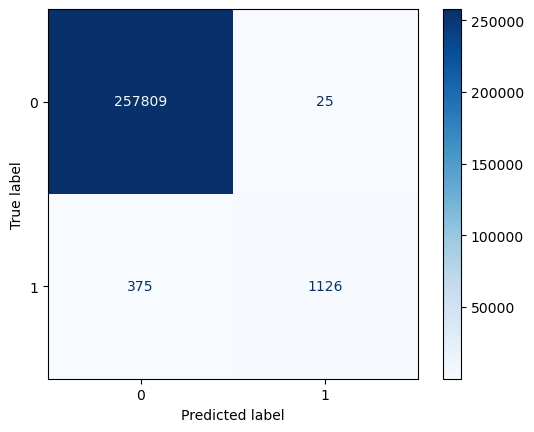

In [9]:
#checking confusion matrix of randomforestclassifier  because of its greater accuracy
cm = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


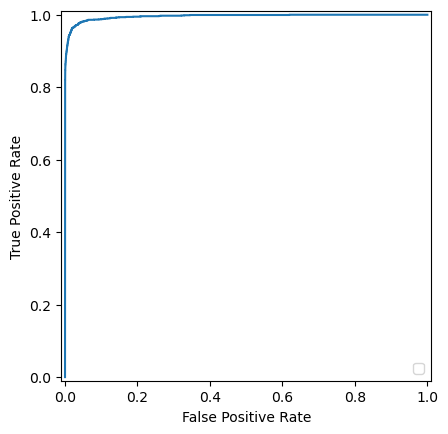

In [10]:
#checking roc curve
y_proba_rf = rf.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba_rf)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


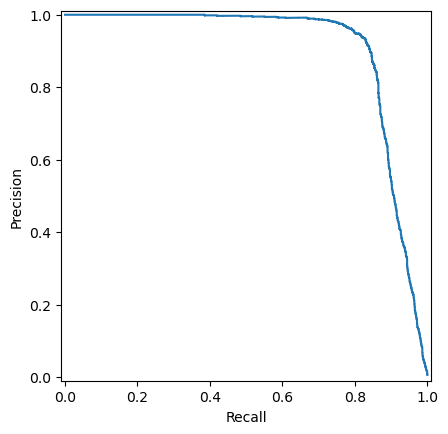

In [11]:


precision, recall, _ = precision_recall_curve(y_val, y_proba_rf)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()


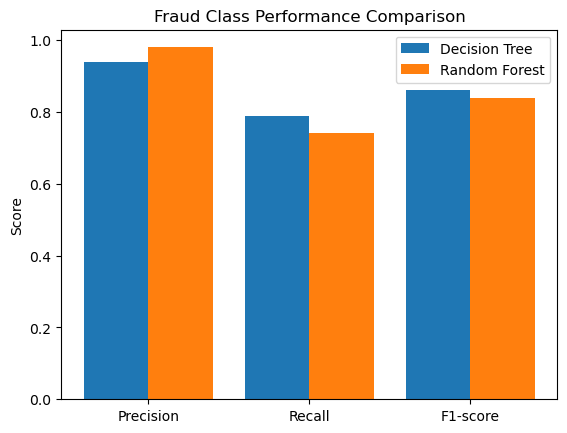

In [12]:
metrics = ['Precision', 'Recall', 'F1-score']
dt_scores = [0.94, 0.79, 0.86]
rf_scores = [0.98, 0.74, 0.84]

x = range(len(metrics))
plt.bar(x, dt_scores, width=0.4, label='Decision Tree', align='center')
plt.bar([i + 0.4 for i in x], rf_scores, width=0.4, label='Random Forest', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Score')
plt.title('Fraud Class Performance Comparison')
plt.legend()
plt.show()


In [13]:
#as per the result decision tree and random forest classifier is somewhat similar(output) so using voting classifier to take the best based on the combination
ensemble = VotingClassifier(estimators=[
    ('dt', dt),
    ('rf', rf)
], voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_val)
print(classification_report(y_val, y_pred_ens))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.79      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.90      0.93    259335
weighted avg       1.00      1.00      1.00    259335



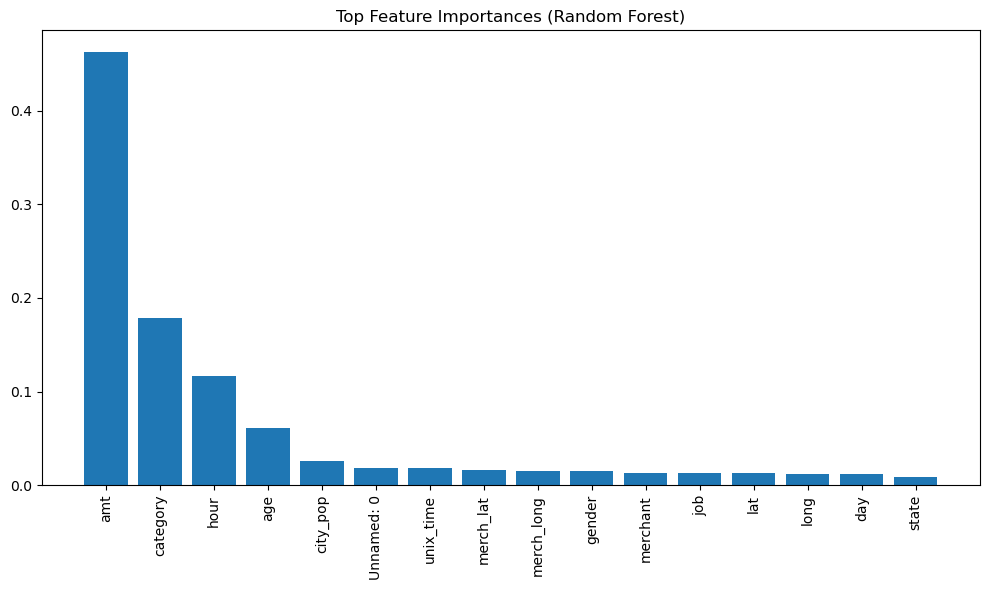

In [14]:
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Top Feature Importances (Random Forest)")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


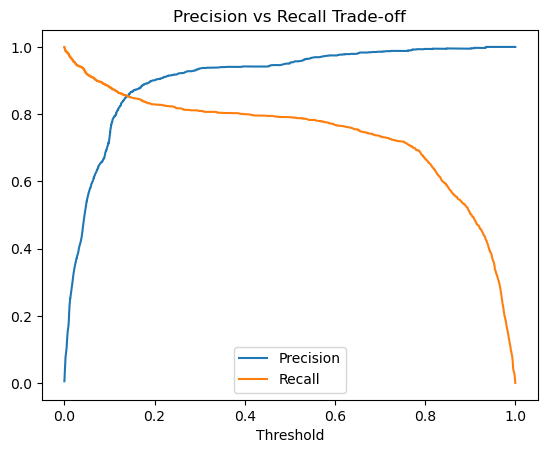

In [15]:
#precision vs Recall Trade-off
y_proba_ens = ensemble.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_proba_ens)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision vs Recall Trade-off')
plt.show()


In [16]:
# applying a custom decision threshold to control the balance between precision and recall
optimal_thresh = 0.35  # example
y_pred_thresh = (y_proba_ens >= optimal_thresh).astype(int)
print(classification_report(y_val, y_pred_thresh))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.94      0.80      0.87      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.90      0.93    259335
weighted avg       1.00      1.00      1.00    259335



In [17]:
#checking generalization with the help of test data so again encoding the whole process again
df_train = pd.read_csv(r'E:\frauddetectionML\FraudDetectML\fraudTrain.csv')

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['day'] = df_train['trans_date_trans_time'].dt.day
df_train['age'] = pd.to_datetime('2025-01-01') - pd.to_datetime(df_train['dob'])
df_train['age'] = df_train['age'].dt.days // 365

cat_cols = ['category', 'merchant', 'job', 'gender', 'state']
encoders = {}
for col in cat_cols:
    df_train[col] = df_train[col].astype(str)
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    encoders[col] = le


df_test = pd.read_csv(r'E:\frauddetectionML\FraudDetectML\fraudTest.csv')


df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['day'] = df_test['trans_date_trans_time'].dt.day
df_test['age'] = pd.to_datetime('2025-01-01') - pd.to_datetime(df_test['dob'])
df_test['age'] = df_test['age'].dt.days // 365


for col in cat_cols:
    df_test[col] = df_test[col].astype(str)
    df_test[col] = df_test[col].apply(lambda x: x if x in encoders[col].classes_ else 'unknown')
    if 'unknown' not in encoders[col].classes_:
        encoders[col].classes_ = np.append(encoders[col].classes_, 'unknown')
    df_test[col] = encoders[col].transform(df_test[col])


df_test.drop(['trans_date_trans_time', 'dob', 'cc_num', 'first', 'last',
              'street', 'city', 'zip', 'trans_num'], axis=1, inplace=True)


X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']


y_pred_test = ensemble.predict(X_test)
print("Test Report:\n", classification_report(y_test, y_pred_test))


Test Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.66      0.77      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.83      0.88      0.85    555719
weighted avg       1.00      1.00      1.00    555719

